---
# Problem 2 (R)

1. Use the following nutrition dataset: https://github.com/bforoura/IDS/blob/main/HW4/nutrition_subset.csvLinks to an external site.
2. The elements in the data set are food items of various sizes, ranging from a teaspoon of cinnamon to an entire carrot cake.
3. Sort the data set by saturated_ fat and produce a listing of the five food items highest in saturated fat. Comment on the validity of comparing food items of different sizes.
4. Create a new variable, saturated_ fat_ per_gram, by dividing the amount of saturated fat  by the weight in grams. Sort the data set by saturated_ fat_ per_gram and produce a listing of the five food  items highest in saturated fat per gram. Which food has the most saturated fat per gram?
5. Standardize (zero mean) the field saturated_ fat_ per_gram, and produce a listing of all the food items that are outliers at the high end of the scale. How many food items are outliers at the low end of the scale? Create a density plot for saturated_ fat_ per_gram
6. Are there any missing values? If so, impute as necessary and explain your approach.
7. Standardize (zero mean) the numeric variables, and determine if there are any outliers.
8. Summarize your findings.

Summarization and overall explanation located at the end of the notebook.

---

In [1]:
# 1. Reading the data file

library(readr)
nutrition_subset <- read_csv("https://raw.githubusercontent.com/bforoura/IDS/main/HW4/nutrition_subset.csv", show_col_types = FALSE)

In [2]:
# 1. Convert to data frame and summarize

summary(nutrition_subset)

  food item         weight_in_grams  saturated_fat      cholesterol     
 Length:961         Min.   :   0.4   Min.   :  0.000   Min.   :   0.00  
 Class :character   1st Qu.:  32.0   1st Qu.:  0.000   1st Qu.:   0.00  
 Mode  :character   Median : 113.0   Median :  0.400   Median :   0.00  
                    Mean   : 149.4   Mean   :  3.988   Mean   :  32.55  
                    3rd Qu.: 218.0   3rd Qu.:  3.300   3rd Qu.:  20.00  
                    Max.   :1542.0   Max.   :119.900   Max.   :2053.00  

In [3]:
# 3. Sort the data set by saturated_ fat

sorted_saturated_fat <- head(nutrition_subset[order(nutrition_subset$saturated_fat, decreasing = TRUE),])

# Produce a listing of the five food items highest in saturated fat.
head(sorted_saturated_fat, 5)

food item,weight_in_grams,saturated_fat,cholesterol
<chr>,<dbl>,<dbl>,<dbl>
CHEESECAKE 1 CAKE,1110,119.9,2053
ICE CREAM; VANLLA; RICH 16% FT1/2 GAL,1188,118.3,703
YELLOWCAKE W/ CHOCFRSTNG;COMML1 CAKE,1108,92.0,609
CREME PIE 1 PIE,910,90.1,46
LARD 1 CUP,205,80.4,195


In [5]:
# 4. Create a new variable, saturated_ fat_ per_gram, by dividing the amount of saturated fat  by the weight in grams.

nutrition_subset$saturated_fat_per_gram <- nutrition_subset$saturated_fat / nutrition_subset$weight_in_grams

# Sort the data set by saturated_ fat_ per_gram and
sorted_saturated_fat_per_gram <- nutrition_subset[order(nutrition_subset$saturated_fat_per_gram, decreasing = TRUE),]

# Produce a listing of the five food  items highest in saturated fat per gram.
head(sorted_saturated_fat_per_gram, 5)

food item,weight_in_grams,saturated_fat,cholesterol,saturated_fat_per_gram
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
BUTTER; SALTED 1 TBSP,14,7.1,31,0.5071429
BUTTER; UNSALTED 1 TBSP,14,7.1,31,0.5071429
BUTTER; SALTED 1/2 CUP,113,57.1,247,0.5053097
BUTTER; UNSALTED 1/2 CUP,113,57.1,247,0.5053097
BUTTER; SALTED 1 PAT,5,2.5,11,0.5000000


In [6]:
# 5. Standardize (zero mean) the field saturated_ fat_ per_gram

# Standardize using the scale() function and sumarize
nutrition_subset$scaled_saturated_fat_per_gram <- scale(x = nutrition_subset$saturated_fat_per_gram)
summary(nutrition_subset$scaled_saturated_fat_per_gram)

# Produce a listing of all the food items that are outliers at the high end of the scale.
nutrition_subset[nutrition_subset$scaled_saturated_fat_per_gram > 3,]

       V1         
 Min.   :-0.5620  
 1st Qu.:-0.5620  
 Median :-0.4411  
 Mean   : 0.0000  
 3rd Qu.: 0.1539  
 Max.   : 7.1068  

food item,weight_in_grams,saturated_fat,cholesterol,saturated_fat_per_gram,scaled_saturated_fat_per_gram
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,"<dbl[,1]>"
CHOCOLATE; BITTER OT BAKING 1 OZ,28.35,9.0,0,0.3174603,4.238469
COCONUT; RAW; SHREDDED 1 CUP,80.00,23.8,0,0.2975000,3.936637
COCONUT; DRIED; SWEETND;SHREDD1 CUP,93.00,29.3,0,0.3150538,4.202078
COCONUT; RAW; PIECE 1 PIECE,45.00,13.4,0,0.2977778,3.940837
BUTTER; SALTED 1/2 CUP,113.00,57.1,247,0.5053097,7.079055
BUTTER; UNSALTED 1/2 CUP,113.00,57.1,247,0.5053097,7.079055
LARD 1 CUP,205.00,80.4,195,0.3921951,5.368580
FATS; COOKING/VEGETBL SHORTENG1 TBSP,13.00,3.3,0,0.2538462,3.276520
LARD 1 TBSP,13.00,5.1,12,0.3923077,5.370282


In [9]:
# 5. How many food items are outliers at the low end of the scale?

# Producing a listing of all the food items that are outliers at the low end of the scale
nutrition_subset[nutrition_subset$scaled_saturated_fat_per_gram < 3,]

# Printing the number of food items that are outliers at the low end of the scale
cat ("The number of outliers on the low end of the scale:", sum(nutrition_subset$scaled_saturated_fat_per_gram < 3))

food item,weight_in_grams,saturated_fat,cholesterol,saturated_fat_per_gram,scaled_saturated_fat_per_gram
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,"<dbl[,1]>"
GELATIN; DRY 1 ENVELP,7.00,0.0,0,0.000000000,-0.56204258
SEAWEED; SPIRULINA; DRIED 1 OZ,28.35,0.8,0,0.028218695,-0.13533042
YEAST; BAKERS; DRY; ACTIVE 1 PKG,7.00,0.0,0,0.000000000,-0.56204258
PARMESAN CHEESE; GRATED 1 OZ,28.35,5.4,22,0.190476190,2.31826445
PARMESAN CHEESE; GRATED 1 CUP,100.00,19.1,79,0.191000000,2.32618530
PARMESAN CHEESE; GRATED 1 TBSP,5.00,1.0,4,0.200000000,2.46227981
YEAST; BREWERS; DRY 1 TBSP,8.00,0.0,0,0.000000000,-0.56204258
LAMB;CHOPS;ARM;BRAISED;LEAN 1.7 OZ,48.00,2.9,59,0.060416667,0.35155481
TUNA; CANND; DRND;WATR; WHITE 3 OZ,85.00,0.3,48,0.003529412,-0.50867218


The number of outliers on the low end of the scale: 946

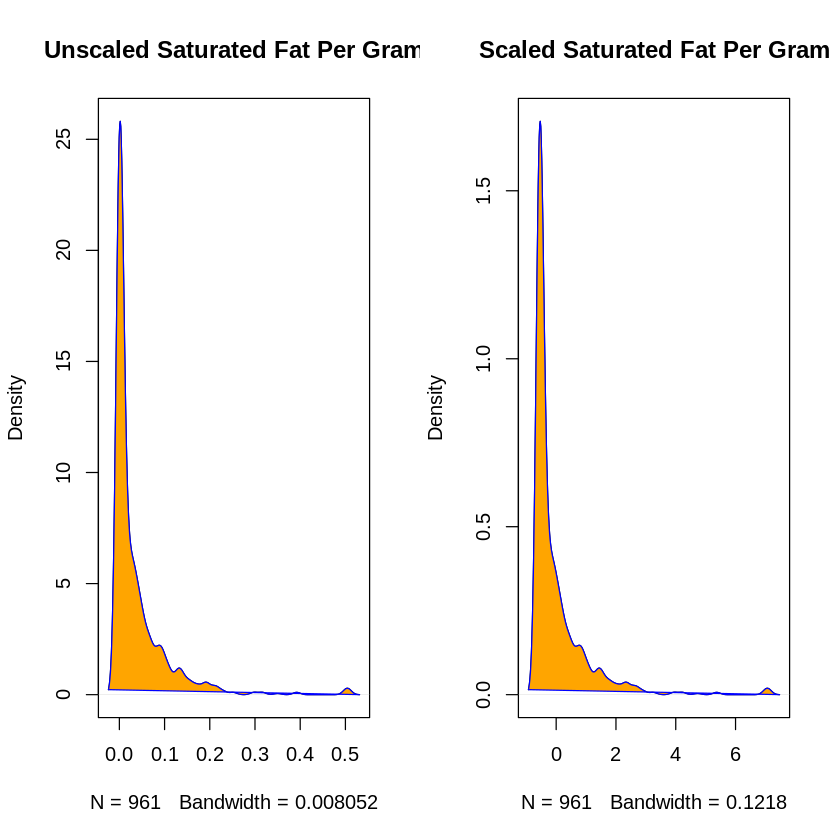

In [12]:
# 5. Create a density plot for saturated_ fat_ per_gram

par(mfrow=c(1, 2))

# Kernel Density Plot
d1 <- density(nutrition_subset$saturated_fat_per_gram)

# Plots the results
plot(d1, main="Unscaled Saturated Fat Per Gram")

# Plots the results (filled)
polygon(d1, col="orange", border="blue")


# Kernel Density Plot
d2 <- density(nutrition_subset$scaled_saturated_fat_per_gram)

# plots the results
plot(d2, main="Scaled Saturated Fat Per Gram")

# plots the results (filled)
polygon(d2, col="orange", border="blue")

In [13]:
# 6. Are there any missing values? If so, impute as necessary and explain your approach.

sum(is.na(nutrition_subset))

[1] 0

In [14]:
# 7. Standardize (zero mean) the numeric variables and summarize them

nutrition_subset$scaled_weight_in_grams <- scale(x = nutrition_subset$weight_in_grams)

summary(nutrition_subset$scaled_weight_in_grams)

nutrition_subset$scaled_saturated_fat <- scale(x = nutrition_subset$saturated_fat)

summary(nutrition_subset$scaled_saturated_fat)

nutrition_subset$scaled_cholesterol <- scale(x = nutrition_subset$cholesterol)

summary(nutrition_subset$scaled_cholesterol)

# Determine if there are any outliers.

scaled_weight_in_grams_outliers <- (nutrition_subset$scaled_weight_in_grams < -3 |
                                    nutrition_subset$scaled_weight_in_grams > 3 )

scaled_saturated_fat_outliers <- (nutrition_subset$scaled_saturated_fat < -3 |
                                    nutrition_subset$scaled_saturated_fat > 3 )

scaled_cholesterol_outliers <- (nutrition_subset$scaled_cholesterol < -3 |
                                    nutrition_subset$scaled_cholesterol > 3 )

cat ("\nThere are", sum(scaled_weight_in_grams_outliers), "outliers for scaled_weight_in_grams. \n")
cat ("There are", sum(scaled_saturated_fat_outliers), "outliers for scaled_saturated_fat. \n")
cat ("There are", sum(scaled_cholesterol_outliers), "outliers for scaled_cholesterol. \n")

       V1         
 Min.   :-0.8471  
 1st Qu.:-0.6674  
 Median :-0.2070  
 Mean   : 0.0000  
 3rd Qu.: 0.3899  
 Max.   : 7.9165  

       V1         
 Min.   :-0.3711  
 1st Qu.:-0.3711  
 Median :-0.3339  
 Mean   : 0.0000  
 3rd Qu.:-0.0640  
 Max.   :10.7882  

       V1         
 Min.   :-0.2714  
 1st Qu.:-0.2714  
 Median :-0.2714  
 Mean   : 0.0000  
 3rd Qu.:-0.1046  
 Max.   :16.8426  


There are 22 outliers for scaled_weight_in_grams. 
There are 20 outliers for scaled_saturated_fat. 
There are 17 outliers for scaled_cholesterol. 


---
## 8. Summarize your findings.
---
1. I read the data file, converted it to a data frame and summarized it.
2. The elements in the data set are food items of various sizes, ranging from a teaspoon of cinnamon to an entire carrot cake.
3. I sorted the dataset by saturated_fat in decreasing order using the head() and order() functions and found the top five food items in saturated fat: CHEESECAKE 1 CAKE, ICE CREAM; VANLLA; RICH 16% FT1/2 GAL, YELLOWCAKE W/ CHOCFRSTNG;COMML1 CAKE, CREME PIE 1 PIE, LARD 1 CUP. Comparing food items of different sizes may not lead to conclusive information if it is the only factor being considered. Other factors should be taken into consideration such as what the food is made out of or where it came from. The size in food may not be the most important factor when comparing them, so it should not be the only factor being taken into account.
4. I created a new variable called saturated_fat_per_gram by dividing the amount of saturated fat by the weight in grams. I then sorted the data set by this new variable in decreasing order and found the top 5 highest food items in this variable. The highest that had the most saturated fat per gram was both **salted and unsalted butter**.
5. I standardized the data using the scale() function. I produced a list of both the high and low end outliers. The number of food items that are outliers at the low end of the scale is **946**. I then created a density table for both the scaled and unscaled values of saturated_fat_per_gram. It coinsides with the data and explains why there are so many outliers on the left end.
6. I checked if the data had any missing values by getting the sum of na values in the entire data set using the is.na() function. There were 0 missing values found.
7. I assumed that we were only working with the variables weight_in_grams, saturated_fat, and cholesterol for this question since we already standardized saturated_fat_per_gram previously. I standardized these variables using the scale() function. I then determined if there were any outliers by using the 3 standard deviation rule and summing the number of outliers found. There did appear to be outliers within the original data set. I found 22, 20, and 17 outliers within the respective standardized columns.
---